In [1]:
import numpy as np
import rashba as rs
from IPython.display import clear_output
import rashba_gap as gap
import conductivity as cnd
import collectiveModes as col
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
def findModes(eigvals,eigvecs,ωarray,tol,interval=(0,-1),rounding=4):
    imin,imax = interval
    λ = abs(eigvals[imin:imax,:])
    ω = ωarray[imin:imax]
    modes = eigvecs[imin:imax,...]
    indices = np.array(np.asarray(abs(λ)<tol).nonzero())
    for i in range(indices.shape[-1]):
        ind = indices[0,i] #At which frequency is the value found
        comp = indices[1,i]#Which eigenvalue at that frequency is it
        print(f"Eigenvalue at ω = {ω[ind]:.{rounding}g} is: ")
        print(f"{(λ[ind,comp]):.{rounding}g}")
        mode = np.round(modes[ind,:,comp],rounding)
        print(f"The eigenvector corresponds to: ")
        print(f"{mode[3]:{rounding}g} s   {mode[1]:{rounding}g} px    {mode[2]:{rounding}g} py")
        print(f"{mode[0]:{rounding}g} is  {mode[4]:{rounding}g} ipx   {mode[5]:{rounding}g} ipy")
#Reference value for α=0.1, Vs=1, Vp=0,μ=-3,ωc=1
η00=0.38706616971928565/np.sqrt(2)
#Gap for α=0.1,Vp=1,Vs=0 (chiral phase), μ=-3., ωc=1
η0p = 0.17678111401931917
Δpmin = 0.30586428493580037/2

In [3]:
N=600
α=0.1
ωc=1
μ=-3
Vs = 1
Vp = 0
V=np.array([Vs,Vp,Vp])
T=0
η0 = η0p*np.array([1,1,1j])
η = gap.findGapFast(V,η0=η0,N=N,ωc=ωc,T=T,α=α,maxiter=5000,tol=1e-10,μ=μ)
print(f"s-wave: {η[0]}")
print(f"px-wave: {η[1]}")
print(f"py-wave: {η[2]}")
fE = gap.free_energy(η,V,N=1200,α=α)
print(f"Free energy is {fE}")
-3.2573038300284494

Maxdiff is 5.716742634831547e-10
Maxdiff is 2.980825031251344e-10
Maxdiff is 1.554260609104597e-10
Maxdiff is 8.104217297244652e-11
Converged after 34 iterations
s-wave: (0.3872120319483558-6.684482941045282e-08j)
px-wave: 0j
py-wave: 0j
Free energy is -3.198403992040776


-3.2573038300284494

In [54]:
##Phase diagram
swave = np.linspace(2.5,3.5,100,endpoint=False)
N=1200
α=.1
μ=-3
ωc=10
Vp=3
T=0
#data = np.load(f"./gapdata/α=0.01,N=1200,Vs=1.npy")
#ηprev = data[:3,:]
results = []
for i,s in enumerate(swave):
    print(f"Iteration {i+1} of {100}")
    if ((i+1)%2)==0:
        clear_output(wait=True)
    if s<2.75:
        η0==η0p*np.array([0,1,1j])
    else:
        η0=np.array([1,0,0])
    V = np.array([s,Vp,Vp])
    #η = gap.findGapFast(V,η0=η0,N=400,ωc=ωc,T=T,α=α,maxiter=10000,tol=1e-9,μ=μ,quiet=True)
    #η = gap.findGapFast(V,η0=η0,N=600,ωc=ωc,T=T,α=α,maxiter=5000,tol=1e-10,μ=μ,quiet=True)
    η = gap.findGapFast(V,η0=η0,N=N,ωc=ωc,T=T,α=α,maxiter=1000,tol=1e-10,μ=μ,quiet=True)
    print(η)
    results.append(η)
results = np.array(results)
data = np.concatenate((results.transpose(),swave[None,:]),axis=0)

Converged after 55 iterations
[ 0.56890314-0.j -0.        +0.j -0.        +0.j]


2.2525252525252526


Text(0, 0.5, '$\\Delta/\\left|\\Delta_{E_x}^0\\right|$')

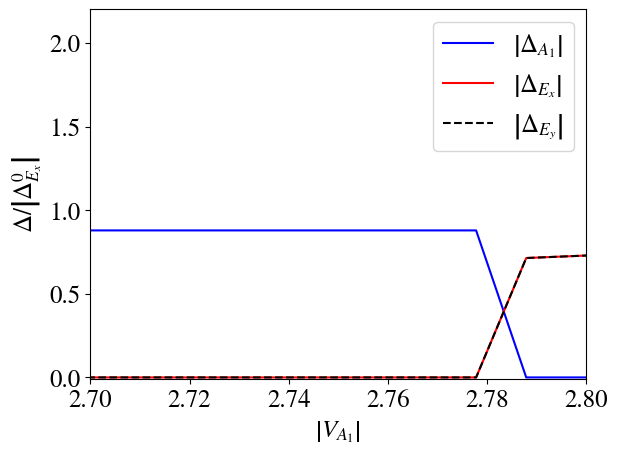

In [78]:
dat = np.load(f"./gapdata/α=0.1,N=1200,Vs=2.5,ωc=10.npy")
ηs,ηpx,ηpy,pwave = dat
pwave=abs(pwave)
cut = 25
norm =η0p
print(pwave[cut])
plt.plot(pwave[:cut],abs(ηs)[:cut]/norm,c="b",label="$\\left|\\Delta_{A_1}\\right|$")
plt.plot(pwave[:cut],abs(ηpy)[:cut]/norm,c="r",label="$\\left|\\Delta_{E_x}\\right|$")
plt.plot(pwave[:cut],abs(ηpx)[:cut]/norm,linestyle="dashed",c="black",label="$\\left|\\Delta_{E_y}\\right|$")
plt.plot(pwave[cut:],abs(ηs)[cut:]/norm,c="b")
plt.plot(pwave[cut:],abs(ηpy)[cut:]/norm,c="r")
plt.plot(pwave[cut:],abs(ηpx)[cut:]/norm,linestyle="dashed",c="black")
plt.legend()
#plt.plot([pwave[cut]]*2,[0,2])
plt.ylim((-0.01,2.2))
plt.xlim((2.7,2.8))
plt.xlabel("$\\left|V_{A_1}\\right|$")
#plt.ylabel("$\\frac{\\left|\\Delta\\right|}{\\left|\\Delta_{\\text{min}}\\right|}$",rotation="horizontal")
plt.ylabel("$\\Delta/\\left|\\Delta_{E_x}^0\\right|$")
#plt.gca().yaxis.set_label_coords(-0.12,0.5)
#plt.savefig(f"./Plots/p-s-transition,μ={μ},ωc={ωc}.pdf",bbox_inches='tight')

In [76]:
#dat = np.concatenate((results.transpose(),swave[None,:]),axis=0)
print(data.shape)
#np.save(f"./gapdata/α={α},N=1200,Vp=3,ωc={ωc}",data)
#print(data[:,0])

(4, 100)


In [2]:
α=0.1
Vs=1
T=0
ωc=1
μ=-3
gapdata = np.load(f"./gapdata/α={α},N=1200,Vs=1,ωc={ωc}.npy")
Vp = 1
index = np.asarray(abs(gapdata[3,:]-Vp)<1e-8).nonzero()[0][0]
Vp = abs(gapdata[3,index])
print(f"Using V_p = {Vp}")
η = gapdata[:3,index]
print(f"Where η is: ")
print(η)
V = np.array([Vs,Vp,Vp])

Using V_p = 0.9999999999999999
Where η is: 
[ 0.38713836-0.j -0.        +0.j -0.        +0.j]


In [3]:
N=400
Nω=400
ωmin = 1e-10*η00
ωmax = 2.25 *η00
ωarray = np.linspace(ωmin,ωmax,Nω)
σ,VeffInv,Q,Qm = cnd.σ_simplified(V,η,ωarray,N=N,reg=5e-4j,α=α,T=T,ωc=ωc,μ=μ)

Using interactions: 
[-1. -1. -1.]
Momentum interval 1 of 1
Momentum interval 1 of 1


Text(0.5, 0, '$\\omega/\\left|\\Delta_\\text{min}\\right|$')

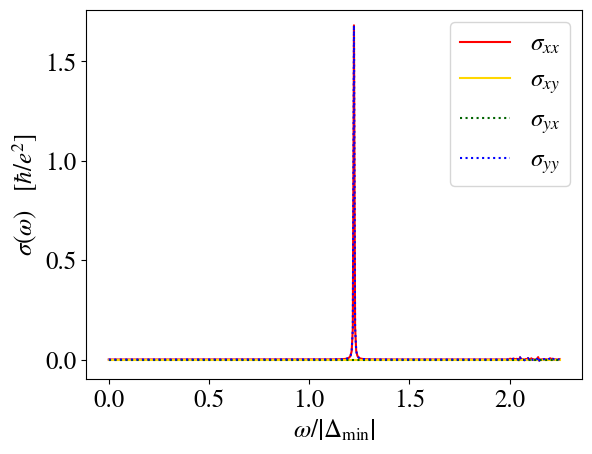

In [4]:
labels=("$\\sigma_{xx}$","$\\sigma_{xy}$","$\\sigma_{yx}$","$\\sigma_{yy}$")
colors = ("r","gold","darkgreen","b")
st = ("solid","solid","dotted","dotted")
off = 0
for i in range(2):
    for j in range(2):
        plt.plot(ωarray/η00,σ[:,i,j]+off*0.0*np.max(σ),label=labels[off],linestyle=st[off],c=colors[off])
        off+=1
plt.ylim(-.1,1.76)
#plt.xlim((1.2,1.7))
plt.legend()
plt.ylabel("$\\sigma(\\omega)\\quad[\\hbar/e^2]$")
plt.xlabel("$\\omega/\\left|\\Delta_\\text{min}\\right|$")
#plt.savefig(f"./Plots/Conductivity_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}.pdf",bbox_inches="tight")
#np.save(f"./conductivities/σ_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}",σ)
#np.save(f"./conductivities/VeffInv_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}",VeffInv)
#np.save(f"./conductivities/Q_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}",Q)
#np.save(f"./conductivities/Qm_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}",Qm)

(0.9, 2.01)

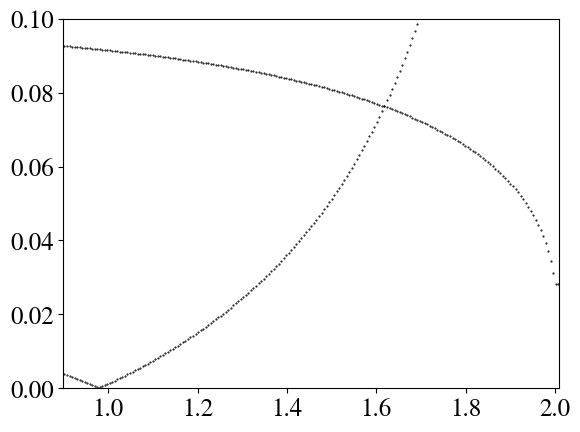

In [63]:
pxwaveblock = VeffInv[:,
    [
        [1,1],
        [4,4]
    ],
    [
        [1,4],
        [1,4]
    ]
]
λ,vecs = np.linalg.eig(pxwaveblock)
plt.plot(ωarray/η00,abs(λ),linestyle="None",c="black",marker=".",markersize=1)
plt.ylim((0,.1))
plt.xlim((0.9,2.01))

In [6]:
r = (350,352)
print(f"Searching between {ωarray[r[0]]/η00} and {ωarray[r[1]]/η00}")
findModes(abs(λ),vecs,ωarray/η00,,interval=r,rounding=3)

Searching between 1.9736842105385963 and 1.9849624060268167
Eigenvalue at ω = 1.97 is: 
0.0202
The eigenvector corresponds to: 


IndexError: index 3 is out of bounds for axis 0 with size 2

In [7]:
freq = col.blockModes(V,η,1,4,ωmax=0.5*η00,ωmin=1e-3*η00,α=α,ωc=ωc,μ=μ,Nω=200,Nk=400,nmodes=10)
print(freq/η00)

Using interactions: 
[-2.5  -2.75 -2.75]
Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
0.29187437185929654


In [4]:
print(freq/η00)

[1.24780976 1.26282854 1.39048811 1.48998748]


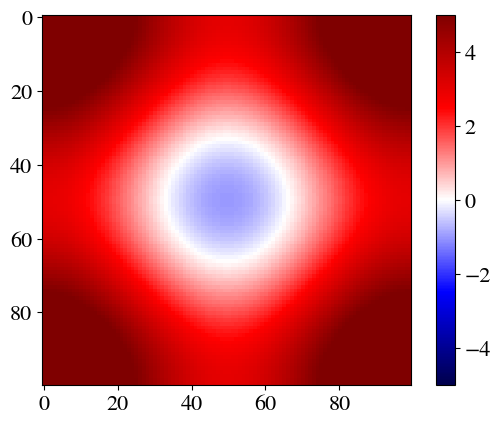

In [142]:
k = np.linspace(-np.pi,np.pi,100)
kx,ky = np.meshgrid(k,k)
dis = rs.ξsquarelattice(kx,ky,μ=-3)
plt.imshow(dis,cmap="seismic",vmin=-5,vmax=5)
plt.colorbar()

In [64]:
## Getting the collective mode spectrum
#data = np.load(f"./gapdata/α=0.1,N=1200,Vs=1,ωc=1.npy")
ηswave = η00*np.sqrt(2)*np.array([1,0,0])
pwave = np.linspace(0.1,2.77,268)
newspec = []
ωc=10
Vs=2.5
α=0.1
μ=-3
for i,p in enumerate(pwave):
    print(f"Iteration {i+1} out of {len(pwave)}.")
    V=np.array([Vs,p,p])
    if p<=2.25:
        ωmin = 1.5*η00
        ωmax = 2.01*η00
        Nω=150
    elif (p>2.25) and (p<2.6):
        ωmin = 0.9*η00
        ωmax = 1.6*η00
        Nω=200
    else:
        ωmin = 1e-10*η00
        ωmax = η00
        Nω=300
    ωmode = col.blockModes(V,ηswave,1,4,ωmax=ωmax,ωc=ωc,α=α,μ=μ,Nω=Nω,Nk=400,ωmin=ωmin)
    print(f"Frequencies are {ωmode/η00}")
    if ((i+1)%2)==0:
        clear_output(wait=True)
    newspec.append(ωmode)

Iteration 267 out of 268.
Using interactions: 
[-2.5  -2.76 -2.76]
Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
Frequencies are 0.14381270911571906
Iteration 268 out of 268.
Using interactions: 
[-2.5  -2.77 -2.77]
Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
Frequencies are 0.0


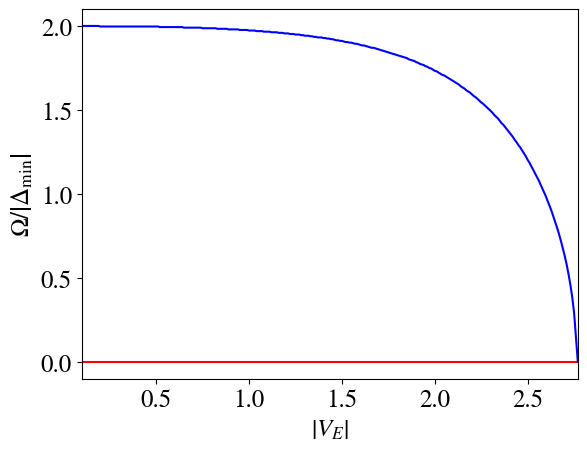

In [75]:
#newspec = np.array(newspec)
#data = np.concatenate((newspec[None,:],pwave[None,:]),axis=0)
#np.save(f"./spectra/α={α},ωc={ωc},μ=μ",data)
pwave,spec = np.load(f"./spectra/α={α},ωc={10},μ=-3,Vs=2.5.npy")
plt.plot([0,4],[0,0],c="r")
#newspec,newpwave = newdata
plt.plot(pwave,spec/η00,c="b")
#plt.plot(pwave2,spec2[0,:]/η00,c="b")
#plt.plot(pwave2,spec2[1,:]/η00,c="r")
#plt.plot(pwave2,spec2[2,:]/η00,c="g")
#plt.plot(pwave2,spec2[3,:]/η00,c="gold")

#plt.plot(newpwave,newspec)
plt.xlim((0.1,2.77))
plt.ylim((-0.1,2.1))
plt.ylabel("$\\Omega/\\left|\\Delta_{\\text{min}}\\right|$")
plt.xlabel("$\\left|V_{E}\\right|$")
#plt.savefig("./Plots/swave_mode_spectrum_ωc=10.pdf",bbox_inches="tight")

In [68]:
dat = np.concatenate((pwave[None,:],newspec[None,:]),axis=0)
np.save(f"./spectra/α={α},ωc={ωc},μ={μ},Vs={Vs}",dat)

In [36]:
for i in range(1,5):
    diff = newspec[77,2]-newspec[72,2]
    newspec[72+i,2] = newspec[72,2]+i*diff/5

In [42]:
data = np.concatenate((newspec.transpose(),pwave[None,:]),axis=0)
np.save(f"./spectra/α={α},ωc={ωc},μ=μ(pwave)",data)

### Plotting some stuff for $V_p=3$ 

In [129]:
α=0.1
T=0
ωc=1
μ=-3
gapdata = np.load(f"./gapdata/α={α},N=1200,Vp=1,ωc={ωc}.npy")
modedata = np.load(f"./spectra/α={α},ωc={ωc},μ={μ},Vp=1(pwave).npy")
Vp = 1
Vs=0.7
index = np.asarray(abs(gapdata[3,:]-Vs)<1e-8).nonzero()[0][0]
Vs = abs(gapdata[3,index])
print(f"Using V_s = {Vs}")
η = gapdata[:3,index]
print(f"Where η is: ")
print(η)
V = np.array([Vs,Vp,Vp])
modefrequencies = modedata[:4,index-1]
print(modedata[4,-1+index])
q=np.array([0.025,0.025])

FileNotFoundError: [Errno 2] No such file or directory: './gapdata/α=0.0,N=1200,Vp=1,ωc=1.npy'

In [2]:
α=0.1
T=0
ωc=1
μ=-3
Vp = 1
Vs=0.7
V = np.array([Vs,Vp,Vp])
q=np.array([0,0.0])
η=η0p*np.array([0,1,1j])

In [3]:
ηnew = gap.findGapFast(V,η0=η,N=1600,ωc=ωc,T=T,α=α,maxiter=5000,tol=1e-10,μ=μ,q=q)
print(f"s-wave: {ηnew[0]}")
print(f"px-wave: {ηnew[1]}")
print(f"py-wave: {ηnew[2]}")

Maxdiff is 9.718681415193942e-11
Converged after 1 iterations
s-wave: (-0+0j)
px-wave: (0.17678111376023142-9.12197769392485e-19j)
py-wave: (-3.469226897811754e-19+0.17678111376023123j)


In [4]:
N=400
Nω=800
ωmin = 1e-10*Δpmin
ωmax = 2.3*Δpmin
ωarray = np.linspace(ωmin,ωmax,Nω)
σ,VeffInv,Q,Qm = cnd.σ_simplified(V,ηnew,ωarray,N=N,reg=5e-4j,α=α,T=T,ωc=ωc,μ=μ,q=q)

Momentum interval 1 of 1
Momentum interval 1 of 1


Text(0.5, 0, '$\\omega/\\left|\\Delta_\\text{min}\\right|$')

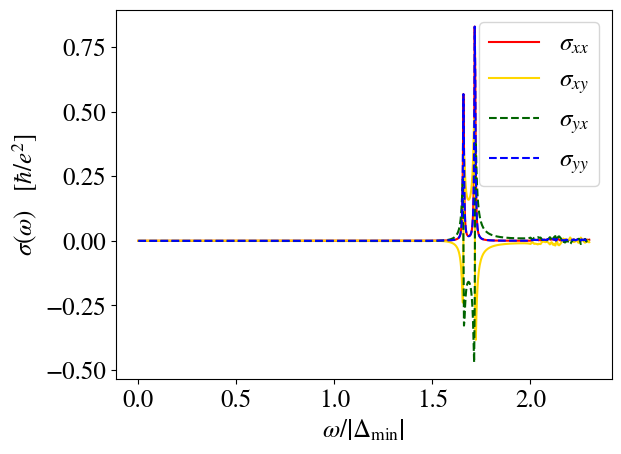

In [5]:
labels=("$\\sigma_{xx}$","$\\sigma_{xy}$","$\\sigma_{yx}$","$\\sigma_{yy}$")
colors = ("r","gold","darkgreen","b")
st = ("solid","solid","dashed","dashed")
off = 0
for i in range(2):
    for j in range(2):
        plt.plot(ωarray/Δpmin,σ[:,i,j]+off*0.0*np.max(σ),label=labels[off],linestyle=st[off],c=colors[off])
        off+=1
#for j,m in enumerate(modefrequencies):
#    freqIndex = np.argmin(abs(m-ωarray))
#    plt.plot([m/Δpmin],[0.007*j+0.05+np.max(σ[freqIndex,...])],color="black",linestyle="None",marker="v",markersize=8.2)
#    print(m/Δpmin)
#plt.ylim(-0.1,1)
#plt.gca().lines[-1].set_label("Modes")
#plt.xlim((1.3,2.1))
plt.legend(loc="upper right")
plt.ylabel("$\\sigma(\\omega)\\quad[\\hbar/e^2]$")
plt.xlabel("$\\omega/\\left|\\Delta_\\text{min}\\right|$")
#plt.savefig(f"./Plots/Conductivity_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}(ycurrent).pdf",bbox_inches="tight")
#np.save(f"./conductivities/σ_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}(ycurrent)",σ)
#np.save(f"./conductivities/VeffInv_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}(ycurrent)",VeffInv)
#np.save(f"./conductivities/Q_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}(ycurrent)",Q)
#np.save(f"./conductivities/Qm_α={α},ωc={ωc},μ={μ},Vs={Vs},Vp={Vp}(ycurrent)",Qm)

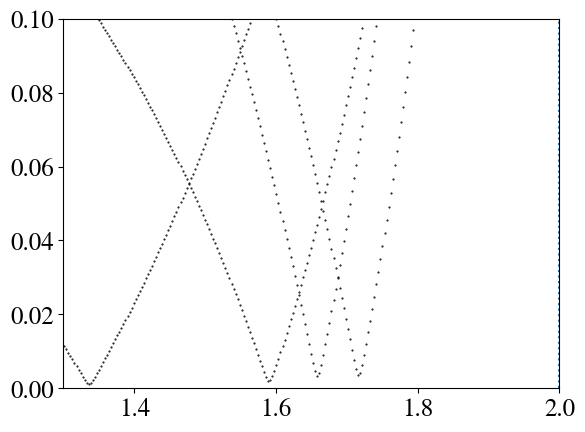

In [9]:
λ,vecs = np.linalg.eig(VeffInv)
plt.plot(ωarray/Δpmin,abs(λ),linestyle="None",c="black",marker=".",markersize=1)
#plt.ylim((10,98))
plt.ylim((0,.1))
plt.xlim((1.3,2))
plt.plot([2]*2,[0,100],linestyle="dotted")
#for j,m in enumerate(modefrequencies):
#    freqIndex = np.argmin(abs(m-ωarray))
#    plt.plot([m/Δpmin],[0.005],color="red",linestyle="None",marker="v",markersize=8.2)
#    print(m/Δpmin)

In [14]:
r = (400,500)
print(f"Searching between {ωarray[r[0]]/Δpmin} and {ωarray[r[1]]/Δpmin}")
findModes(abs(λ),vecs,ωarray/Δpmin,1.3e-3,interval=r,rounding=4)

Searching between 1.1514392991738422 and 1.4392991239423027
Eigenvalue at ω = 1.336 is: 
0.001116
The eigenvector corresponds to: 
0-0j s   0.6215+0j px    0.0003-0.3373j py
0+0j is  -0.0003+0.3373j ipx   0.6215+0j ipy


In [127]:
print(np.round(np.max(abs(VeffInv+VeffInv.transpose(0,2,1)),axis=0),3))
print()
print(np.round(np.max(abs(VeffInv-VeffInv.transpose(0,2,1)),axis=0),3))

[[0.451 0.    0.    0.    0.    0.   ]
 [0.    0.951 0.    0.    0.    0.183]
 [0.    0.    0.132 0.    0.183 0.   ]
 [0.    0.    0.    0.451 0.    0.   ]
 [0.    0.    0.183 0.    0.132 0.   ]
 [0.    0.183 0.    0.    0.    0.951]]

[[0.    0.    0.    0.067 0.    0.   ]
 [0.    0.    0.    0.    0.035 0.   ]
 [0.    0.    0.    0.    0.    0.035]
 [0.067 0.    0.    0.    0.    0.   ]
 [0.    0.035 0.    0.    0.    0.   ]
 [0.    0.    0.035 0.    0.    0.   ]]


In [ ]:
###### freq = col.pwaveModes(V,η,minGap,ωmin=0.65*minGap,μ=μ,α=α)
print(freq)

In [112]:
freq/minGap*2

array([1.3359199 , 1.43229036, 1.4979975 , 1.58998748])

In [114]:
## Getting the collective mode spectrum
data = np.load(f"./gapdata/α=0.1,N=1200,Vp=1,ωc=1.npy")
swave = abs(data[3,1:80])
gaps = data[:3,1:80]
newspec = []
ωc=1
α=0.1
μ=-3
for i,s in enumerate(swave):
    print(f"Iteration {i+1} out of {len(pwave)}.")
    V=np.array([s,1,1])
    minGap = col.minimalGap(kx,ky,gaps[:,i],α=0,μ=μ)
    ωmode = col.pwaveModes(V,gaps[:,i],minGap,ωc=ωc,α=α,μ=μ,Nω=600,Nk=400,ωmin=1.3*minGap/2)
    missingModes = 4-len(ωmode)
    ωmode = np.append(ωmode,[minGap]*missingModes)
    print(f"Frequencies are {ωmode/η00}")
    if ((i+1)%2)==0:
        clear_output(wait=True)
    newspec.append(ωmode)

Iteration 79 out of 120.
Using the newly normalized interactions: 
[-0.79 -1.   -1.  ]
Momentum interval 1 of 1
Momentum interval 1 of 1
Frequencies are [0.74659218 0.8001334  0.83735108 0.88828053]


In [125]:
newspec=np.array(newspec)
gapdata = np.load(f"./gapdata/α=0.1,N=1200,Vp=1,ωc=1.npy")
swave = abs(gapdata[3,1:80])
data = np.concatenate((newspec.transpose(),swave[None,:]),axis=0)
#np.save(f"./spectra/α={α},ωc={ωc},μ={μ},Vp=1(pwave)",data)

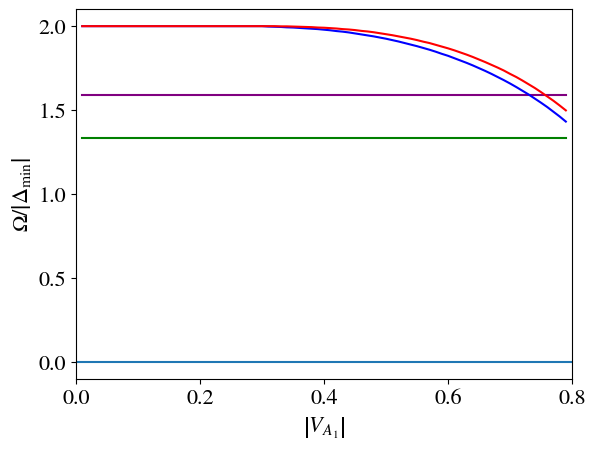

In [256]:
data = np.load(f"./spectra/α={0.1},ωc={1},μ={-3},Vp=1(pwave).npy")
swave = data[4,:]
plt.plot(swave,data[0,:]/minGap*2,c="g")
plt.plot(swave,data[1,:]/minGap*2,c="purple")
plt.plot(swave,data[2,:]/minGap*2,c="b")
plt.plot(swave,data[3,:]/minGap*2,c="r")
plt.plot([0,0.8],[0,0])
plt.xlim((0,0.8))
plt.ylabel("$\\Omega/\\left|\\Delta_{\\text{min}}\\right|$")
plt.xlabel("$\\left|V_{A_1}\\right|$")
#plt.savefig("./Plots/pwave_mode_spectrum.pdf",bbox_inches="tight")

In [151]:
print(np.round(data[1:,70:].transpose()/minGap*2,3))

[[1.59  1.638 1.697 4.642]
 [1.59  1.616 1.676 4.707]
 [1.59  1.593 1.654 4.773]
 [1.59  1.569 1.632 4.838]
 [1.59  1.544 1.607 4.904]
 [1.59  1.519 1.582 4.969]
 [1.59  1.49  1.556 5.034]
 [1.59  1.462 1.528 5.1  ]
 [1.59  1.432 1.499 5.165]]


In [150]:
for i in range(75,79):
    print(data[1,i]*2/minGap)
    data[1,i],data[2,i],data[3,i]=data[2,i],data[3,i],data[1,i]

1.581636060122463
1.5559265442550234
1.5278797996732898
1.4986644407345577


In [8]:
string1 = "_α=0.1,ωc=1,μ=-3,Vs=0.7000000000000001,Vp=1(test,ip+p).npy"
string2 = "_α=0.1,ωc=1,μ=-3,Vs=0.7000000000000001,Vp=1(test,p+ip).npy"
prefix ="./teststuff/"
digits = 4
ind=272
Q1 = np.round((np.load(prefix+"Q"+string1)),digits)[ind,:,[0,3]]
Q2 = np.round((np.load(prefix+"Q"+string2)),digits)[ind,:,[0,3]]
Qm1 = np.round((np.load(prefix+"Qm"+string1)),digits)[ind,:,[0,3]]
Qm2 = np.round((np.load(prefix+"Qm"+string2)),digits)[ind,:,[0,3]]
V1 = np.round(np.load(prefix+"VeffInv"+string1),digits)[ind,
    [
        [0,0],
        [3,3]
    ],
    [
        [0,3],
        [0,3]
    ]]
V2 = np.round(np.load(prefix+"VeffInv"+string2),digits)[ind,
    [
        [0,0],
        [3,3]
    ],
    [
        [0,3],
        [0,3]
    ]]

def show(vec,rounding=5):
    for v in vec:
        print(f"{v[0]:{rounding}g},  {v[1]:{rounding}g}")

In [10]:
show(Q1,rounding=4)
print()
show(Q2,rounding=4)
print()
show(Qm1,rounding=4)
print()

show(Qm2,rounding=4)
print()

0.0005-0.073j,  0.0053+0j
-0.0053-0j,  -0.0005+0.073j

-0.0053-0j,  0.0005-0.073j
0.0005-0.073j,  -0.0053-0j

-0.0005+0.073j,  0.0053+0j
-0.0053-0j,  0.0005-0.073j

-0.0053-0j,  -0.0005+0.073j
-0.0005+0.073j,  -0.0053-0j



In [52]:
print(V1)
print()
print(V2)

[[ 0.0191+0.0036j -0.0003+0.0313j]
 [ 0.0003-0.0313j  0.0191+0.0036j]]

[[ 0.0191+0.0036j -0.0003+0.0313j]
 [ 0.0003-0.0313j  0.0191+0.0036j]]


In [43]:
a = np.arange(0,9,1).reshape((3,3))
print(a)
print(a[
      [
          [0,0],
          [2,2]
      ],
      [
          [0,2],
          [0,2]]
      ])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 2]
 [6 8]]


In [13]:
a = np.random.rand(100)
b = np.random.rand(6,100)
c=a*b
c.shape

(6, 100)